In [12]:
from qiskit import *

In [13]:
nqubits = 3
ckt = QuantumCircuit(nqubits, nqubits)
ckt.h(0)
ckt.cx(0, 1)
ckt.cx(1, 2)
ckt.measure(range(nqubits), range(nqubits))

In [14]:
ckt.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [15]:
backend = Aer.get_backend("qasm_simulator")
results = execute(ckt, backend = backend, shots = 1024).result()

In [16]:
from qiskit.visualization import plot_histogram

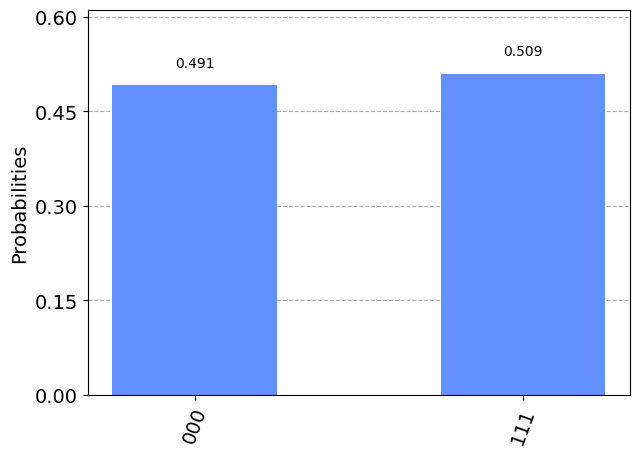

In [17]:
plot_histogram(results.get_counts(ckt))

In [18]:
IBMQ.load_account()
Aer.backends()
provider = IBMQ.get_provider("ibm-q")
provider.backends()
for backend in provider.backends():
    try:
        qubitCount = len(backend.properties().qubits)
    except:
        qubitCount = "simulated"
    print(f"{backend.name()}: {backend.status().pending_jobs} jobs, {qubitCount} qubits")

ibmqfactory.load_account:WARNING:2022-09-04 16:02:13,447: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator: 0 jobs, simulated qubits
ibmq_lima: 47 jobs, 5 qubits
ibmq_belem: 210 jobs, 5 qubits
ibmq_quito: 83 jobs, 5 qubits
simulator_statevector: 0 jobs, simulated qubits
simulator_mps: 0 jobs, simulated qubits
simulator_extended_stabilizer: 0 jobs, simulated qubits
simulator_stabilizer: 0 jobs, simulated qubits
ibmq_manila: 46 jobs, 5 qubits
ibm_nairobi: 136 jobs, 7 qubits
ibm_oslo: 230 jobs, 7 qubits


In [19]:
device = provider.get_backend("ibmq_manila")
job = execute(ckt, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

6314b01392bf5ab0c20fdb5c
Job Status: job has successfully run


account._job_result_object_storage:WARNING:2022-09-04 16:34:05,176: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


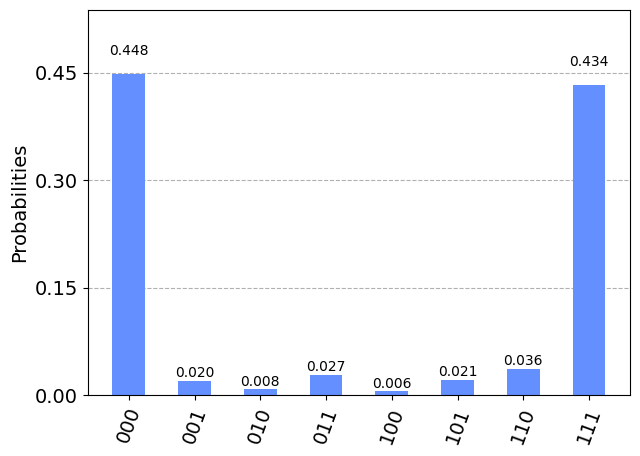

In [20]:
deviceResults = job.result()
plot_histogram(deviceResults.get_counts(ckt))